# Activation Functions

### 1. 개념
- 활성화 함수는 뉴런의 출력 값을 비선형 함수로 변환하는 역할
- 이를 통해 복잡한 모델이 학습할 수 있는 표현의 폭을 넓게 함 (e.g. XOR 문제)

### 2. 주요 활성화 함수와 수식

| 함수       | 수식                                   | 출력 범위       | 중심       | 장점                                      | 단점                                      | 주요 용도               |
|------------|----------------------------------------|------------------|------------|-------------------------------------------|-------------------------------------------|--------------------------|
| **Sigmoid** | $$\sigma(x) = \frac{1}{1 + e^{-x}}$$   | (0, 1)           | 0.5        | 확률처럼 해석 가능                        | Gradient vanishing, zero-centered 아님     | 이진 분류 **출력층**      |
| **Tanh**    | $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$ | (-1, 1)          | **0**      | Zero-centered, Sigmoid보다 나은 성능 (+/-)       | 여전히 gradient vanishing 가능            | **은닉층**, 시계열 모델 등 |
| **ReLU**    | $$\text{ReLU}(x) = \max(0, x)$$        | [0, ∞)           | 0 이상     | 계산 빠름, Gradient 유지 잘됨              | 음수 입력은 출력 0 → **Dying ReLU** 문제   | 대부분의 **은닉층**         |
| **Softmax** | $$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$| (0, 1), 총합 = 1 | 없음       | 다중 클래스 확률 출력                     | 출력 간 상호작용, 수치 불안정 가능성       | 다중 클래스 **출력층**     |



- `Vanishing Gradient` : 딥러닝 네트워크가 깊어질수록 앞쪽 층의 gradient가 점점 작아져서 거의 학습이 안 되는 문제
    - sigmoid, tanh와 같이 미분값이 1보다 작은 함수에서 발생, ReLU에선 gradient가 1이므로 (x>0) 해결 가능
    - (참고) sigmoid의 도함수는 \sigma’(x) = \sigma(x)(1 - \sigma(x))로 최대 기울기는 x가 0일 때, 0.25 (두 번이면 최대 0.25 * 0.25만 남아 전달된다는 의미)
- softmax의 $x_i$는 벡터, 상대적인 확률 계산

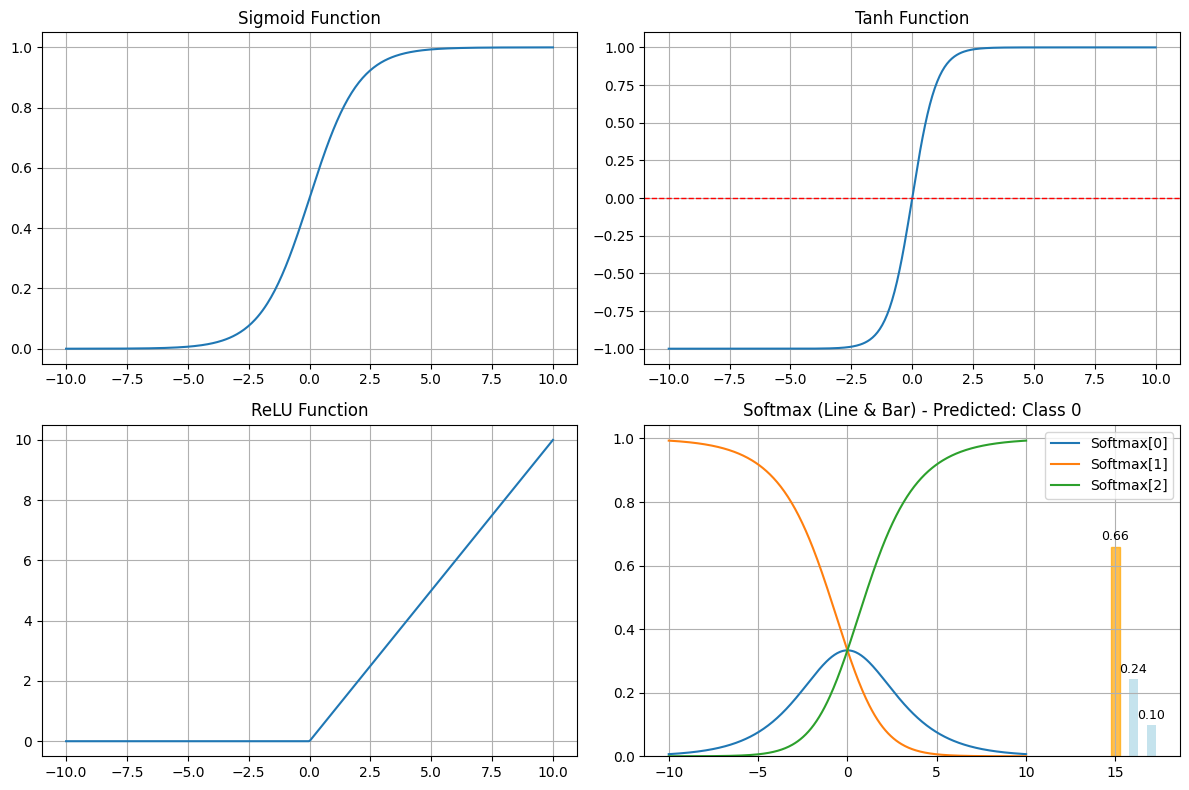

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)  # 벡터 연산 (max(0, x)는 스칼라)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# 입력값 생성
x = np.linspace(-10, 10, 400)

# softmax 라인 그래프용 입력
softmax_input = np.vstack([x, x * 0.5, x * 1.5]).T
softmax_output = np.apply_along_axis(softmax, 1, softmax_input)

# softmax 바 그래프용 입력
z_bar = np.array([2.0, 1.0, 0.1])
softmax_bar = softmax(z_bar)
predicted_class = np.argmax(softmax_bar)

# 그래프 그리기
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Function")
plt.grid(True)

# Tanh
plt.subplot(2, 2, 2)
plt.plot(x, tanh(x))
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Tanh Function")
plt.grid(True)

# ReLU
plt.subplot(2, 2, 3)
plt.plot(x, relu(x))
plt.title("ReLU Function")
plt.grid(True)

# Softmax: 선형 그래프 + 바 그래프 겹쳐서
plt.subplot(2, 2, 4)
plt.plot(x, softmax_output[:, 0], label='Softmax[0]')
plt.plot(x, softmax_output[:, 1], label='Softmax[1]')
plt.plot(x, softmax_output[:, 2], label='Softmax[2]')
plt.title(f"Softmax (Line & Bar) - Predicted: Class {predicted_class}")
plt.legend()
plt.grid(True)

# 바 그래프 겹치기
bar_x = [15, 16, 17]
bars = plt.bar(bar_x, softmax_bar, width=0.5, color='lightblue', alpha=0.7)
bars[predicted_class].set_color('orange')
for i, v in enumerate(softmax_bar):
    plt.text(bar_x[i], v + 0.02, f"{v:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()